### result analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.transform_time import dt64_to_dyr
from utils.timeseries_interpolate import interpolate_at_target

In [2]:
path_pixc_wse = 'data/result/pixc_dianchi_wse.csv'
path_raster_wse = 'data/result/raster_dianchi_wse.csv'

In [3]:
pixc_wse = pd.read_csv(path_pixc_wse, index_col=0)
raster_wse = pd.read_csv(path_raster_wse, index_col=0)

In [4]:
## Interpolate raster_wse to match the timestamps of pixc_wse
raster_wse_interp = interpolate_at_target(timeseries_data=raster_wse, timeseries_target=pixc_wse, method='linear')



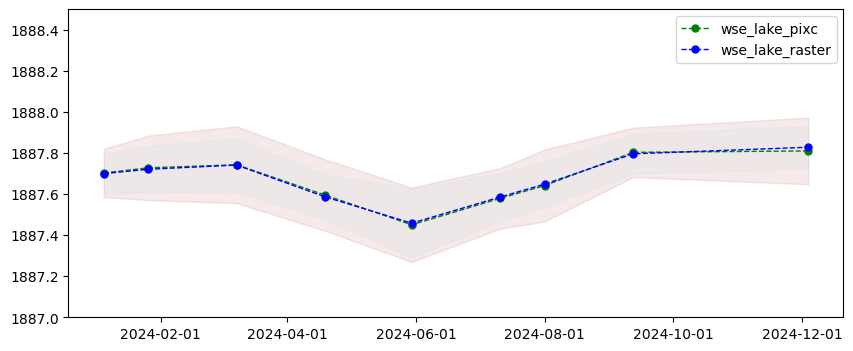

In [5]:
dates_ticks = ['2024-'+str(i+1).zfill(2)+'-01'  for i in range(1,12,2)]
dates_ticks_dyr = [dt64_to_dyr(date) for date in dates_ticks]
fig, ax = plt.subplots(1,1,figsize=(10,4))
## pixc wse
ax.plot(pixc_wse.index, pixc_wse['mean'], '--.', color='green', label='wse_lake_pixc', linewidth=1, markersize=10)
ax.fill_between(pixc_wse.index, np.array(pixc_wse['mean']) - np.array(pixc_wse['std']), \
                np.array(pixc_wse['mean']) + np.array(pixc_wse['std']), color='Brown', alpha=0.1)
## raster wse
ax.plot(raster_wse_interp.index, raster_wse_interp['mean'], '--.', color='blue', label='wse_lake_raster', linewidth=1, markersize=10)
ax.fill_between(raster_wse_interp.index, np.array(raster_wse_interp['mean']) - np.array(raster_wse_interp['std']), \
                np.array(raster_wse_interp['mean']) + np.array(raster_wse_interp['std']), color='LightBlue', alpha=0.1)
ax.set_ylim([1887, 1888.5])
ax.set_xticks(dates_ticks_dyr)
ax.set_xticklabels(dates_ticks)
ax.legend()

